In [1]:
import pandas as pd 
import numpy as np



# Load the dataset

In [2]:
df = pd.read_csv('C:/Users/smrc/Downloads/BrentOilPrices.csv')

In [3]:
# Convert Date to datetime format
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Ensure data is sorted by date
df = df.sort_values(by="Date").reset_index(drop=True)

C:\Users\smrc\AppData\Local\Temp\ipykernel_21936\2652749262.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


In [4]:
print(df[df["Date"].isna()])  # Show rows where date parsing failed

Empty DataFrame
Columns: [Date, Price]
Index: []


In [5]:
df.shape

(9011, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9011 non-null   datetime64[ns]
 1   Price   9011 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 140.9 KB


# Exploratory Data Analysis (EDA)

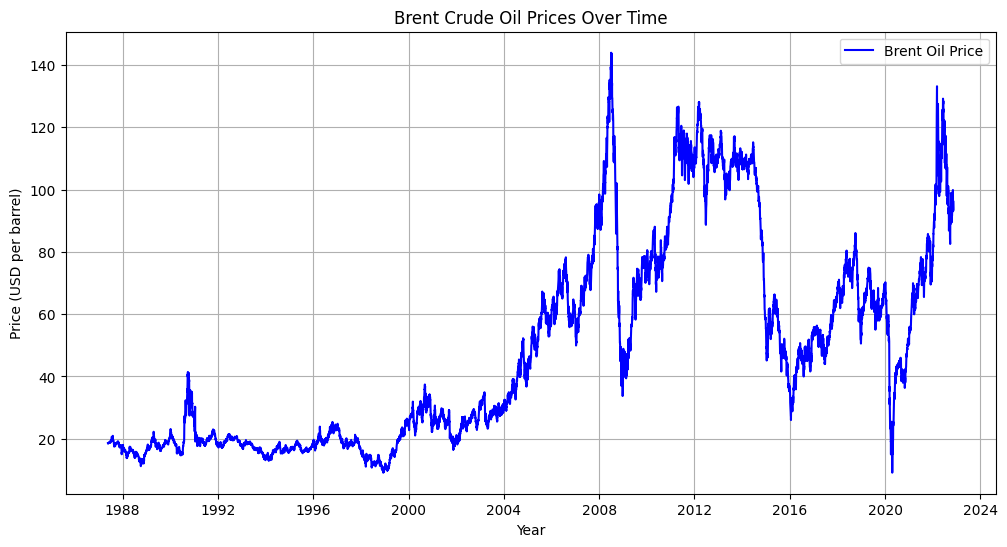

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Price"], label="Brent Oil Price", color="blue")
plt.xlabel("Year")
plt.ylabel("Price (USD per barrel)")
plt.title("Brent Crude Oil Prices Over Time")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
df["Rolling_Mean"] = df["Price"].rolling(window=365).mean()  # 1-year rolling mean
df["Rolling_Std"] = df["Price"].rolling(window=365).std()  # 1-year rolling volatility


# change point detection

In [9]:
from scipy.stats import rankdata, norm
import numpy as np

def pettitt_test(series):
    n = len(series)
    ranks = rankdata(series)
    U_t = np.cumsum(2 * ranks - n - 1)
    K = np.argmax(np.abs(U_t))
    p_value = 2 * np.exp((-6 * (U_t[K] ** 2)) / (n ** 3 + n ** 2))
    return K, p_value

change_point_idx, p_value = pettitt_test(df["Price"])
change_point_date = df["Date"].iloc[change_point_idx]
print(f"Change Detected: {change_point_date}, p-value: {p_value}")


Change Detected: 2004-07-16 00:00:00, p-value: 0.0


### Detect a Single Change Point (Pettitt’s Test)

Pettitt’s test is useful for finding the most significant change in the mean price.

In [10]:
from scipy.stats import rankdata, norm
import numpy as np

def pettitt_test(series):
    """Performs Pettitt’s test to detect a single change point in time series."""
    n = len(series)
    ranks = rankdata(series)  # Rank transform the data
    U_t = np.cumsum(2 * ranks - n - 1)  # Compute U_t statistic
    K = np.argmax(np.abs(U_t))  # Change point index
    p_value = 2 * np.exp((-6 * (U_t[K] ** 2)) / (n ** 3 + n ** 2))  # Approximate p-value
    return K, p_value

# Apply Pettitt's test to detect a change point
change_point_idx, p_value = pettitt_test(df["Price"])

# Get detected change point date
change_point_date = df["Date"].iloc[change_point_idx]

print(f"Detected Change Point: {change_point_date}, p-value: {p_value}")


Detected Change Point: 2004-07-16 00:00:00, p-value: 0.0


### Multiple change point detection  (PELT Algorithm)

In [11]:
import ruptures as rpt

algo = rpt.Pelt(model="l2").fit(df["Price"].values)
change_points = algo.predict(pen=10)

# Display detected dates
df.iloc[change_points[:-1]][["Date", "Price"]]


,Date,Price
30,1987-07-02,19.25
60,1987-08-13,19.40
120,1987-11-05,17.85
145,1987-12-10,17.55
190,1988-02-17,15.85
...,...,...
8960,2022-09-02,93.09
8970,2022-09-16,89.43
8980,2022-10-03,90.68
8990,2022-10-17,91.04


In [12]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(1,1,1)
arima_model = ARIMA(df["Price"], order=(1,1,1)).fit()

# Forecast next 1 year
forecast = arima_model.forecast(steps=365)


Detect Multiple Change Points (Rolling Mean & Volatility)

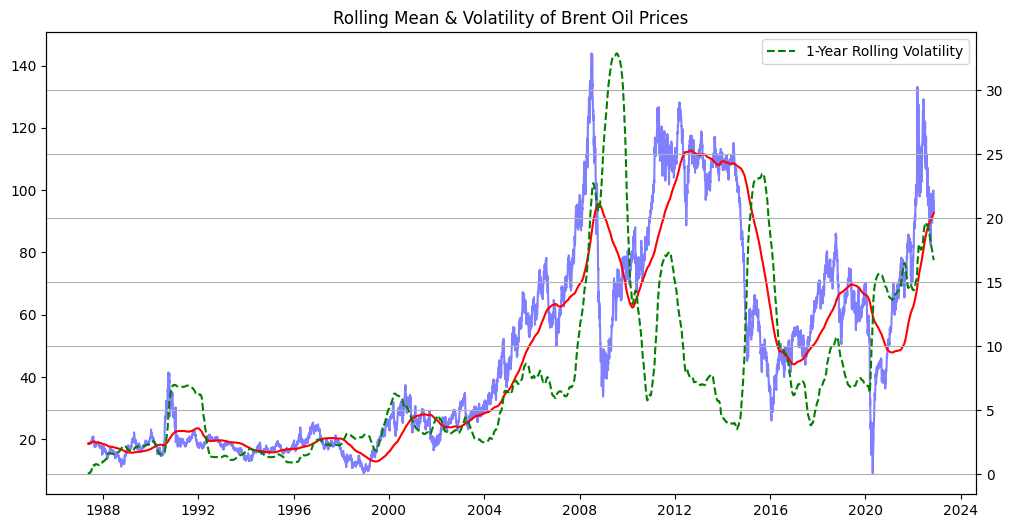

In [13]:
import matplotlib.pyplot as plt

# Compute 1-year rolling mean and standard deviation
df["Rolling_Mean"] = df["Price"].rolling(window=365, min_periods=1).mean()
df["Rolling_Std"] = df["Price"].rolling(window=365, min_periods=1).std()

# Plot rolling mean & volatility
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Price"], label="Brent Oil Price", color="blue", alpha=0.5)
plt.plot(df["Date"], df["Rolling_Mean"], label="1-Year Rolling Mean", color="red")
plt.twinx()
plt.plot(df["Date"], df["Rolling_Std"], label="1-Year Rolling Volatility", color="green", linestyle="dashed")
plt.xlabel("Year")
plt.title("Rolling Mean & Volatility of Brent Oil Prices")
plt.legend()
plt.grid(True)
plt.show()


## Forcasting oil price using ARIMA $ LSTM

A) ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(1,1,1)
arima_model = ARIMA(df["Price"], order=(1,1,1)).fit()

# Forecast next 1 year
forecast = arima_model.forecast(steps=365)
